In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

import glob

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint night > 365.25 and note not like "DD%%" for columns ['observationStartMJD', 'seeingFwhmGeom', 'fieldRA', 'fiveSigmaDepth', 'fieldDec', 'filter']
Found 1748947 visits
Running:  ['opsim_properMotion_night_gt_365_25_and_note_not_like_DD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint note not like "DD%%" for columns ['observationStartMJD', 'seeingFwhmGeom', 'fieldRA', 'fiveSigmaDepth', 'fieldDec', 'filter']
Found 1952027 visits
Running:  ['opsim_properMotion_note_not_like_DD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night > 365.25 and note not like "DD%%"" constraint now.


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 909583752 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/healpy/pixelfunc.py:1583: UserWarning: monopole: 1146.15  dipole: lon: -85.9604, lat: 56.2094, amp: 2277.44
  mono, lon, lat, amp


Plotting complete.
Plotting figures with "note not like "DD%%"" constraint now.


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 1075939228 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/healpy/pixelfunc.py:1583: UserWarning: monopole: 1417.53  dipole: lon: -83.2911, lat: 55.6485, amp: 2830.78
  mono, lon, lat, amp


Plotting complete.


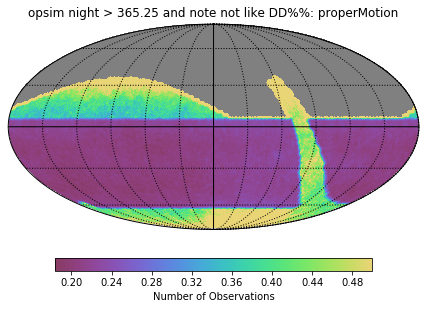

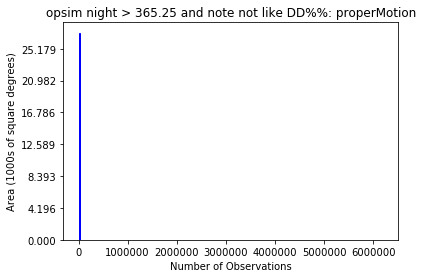

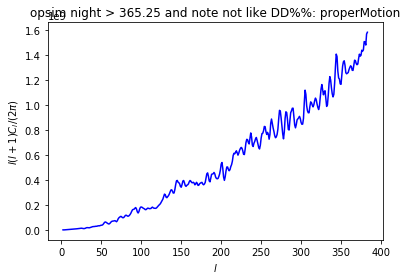

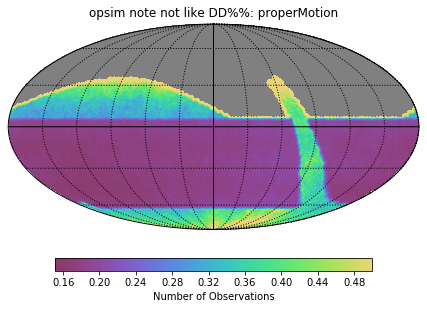

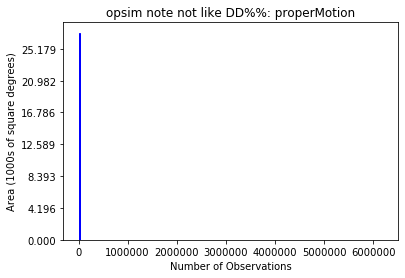

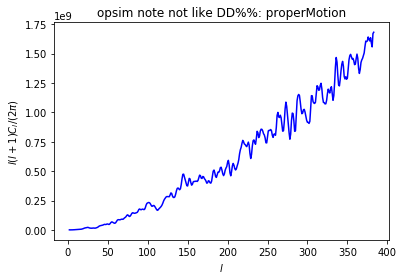

In [2]:
conn = db.OpsimDatabase('baseline_nexp2_v1.7_10yrs.db')
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

sqls=['note not like "DD%%"', 'night > 365.25 and note not like "DD%%"']

bundleList = []
for sql in sqls:
    metric = metrics.ProperMotionMetric(rmag=20.5)
    slicer = slicers.HealpixSlicer()
    summaryStats = [metrics.MedianMetric()]
    plotDict = {'xlabel': 'Number of Observations', 'colorMax': 0.5}
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql,
                                                 plotDict=plotDict,
                                                 summaryMetrics=summaryStats))
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

In [3]:
bundleList[0].summaryValues, bundleList[1].summaryValues

({'Median': 0.1896849698946757}, {'Median': 0.22012225480621128})

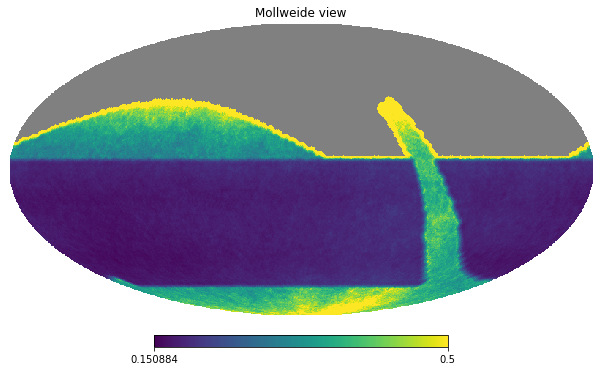

In [4]:
hp.mollview(bundleList[0].metricValues, max=.5)